## tentukan library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LogisticRegression

## load dataset

In [2]:
breastcancer_data = pd.read_csv('breast_cancerr.csv')

In [3]:
breastcancer_data.head()

,KetebalanGumpalan,KeseragamanUkuranSel,KeseragamanBentukSel,AdhesiMarginal,UkuranSelEpitelTunggal,IntiDasar,KromatinLunak,NukleolusBiasa,Mitosis,Kelas
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## TAHAP EDA / PREPROCESSING - DATVIS

In [4]:
# Menentukan Variabel X (Fitur/Atribut) dan Variabel y (Kelas/Label)

X= breastcancer_data.iloc[:, :-1]
y= breastcancer_data.values[:, -1]

pd.DataFrame(X).head()

,KetebalanGumpalan,KeseragamanUkuranSel,KeseragamanBentukSel,AdhesiMarginal,UkuranSelEpitelTunggal,IntiDasar,KromatinLunak,NukleolusBiasa,Mitosis
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [5]:
pd.DataFrame(y).head()

,0
0,2
1,2
2,2
3,2
4,2


In [6]:
# Membagi data menjadi data training dan data testing
# Data untuk testing 20%, data untuk training 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [7]:
print(X.shape, X_train.shape, X_test.shape)

(683, 9) (546, 9) (137, 9)


## membuat model training

In [8]:
# Inisiasi Model

model = DecisionTreeClassifier()

# Training model dengan .fit()

model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.532608695652174, 0.9444444444444444, 'x[1] <= 3.5\ngini = 0.443\nsamples = 546\nvalue = [365, 181]'),
 Text(0.34782608695652173, 0.8333333333333334, 'x[5] <= 5.5\ngini = 0.11\nsamples = 378\nvalue = [356, 22]'),
 Text(0.2608695652173913, 0.7222222222222222, 'x[7] <= 8.5\ngini = 0.053\nsamples = 365\nvalue = [355, 10]'),
 Text(0.21739130434782608, 0.6111111111111112, 'x[5] <= 2.5\ngini = 0.027\nsamples = 360\nvalue = [355, 5]'),
 Text(0.17391304347826086, 0.5, 'gini = 0.0\nsamples = 333\nvalue = [333, 0]'),
 Text(0.2608695652173913, 0.5, 'x[0] <= 5.5\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.21739130434782608, 0.3888888888888889, 'x[7] <= 2.5\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.13043478260869565, 0.2777777777777778, 'x[4] <= 1.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.08695652173913043, 0.16666666666666666, 'x[0] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.043478260869565216, 0.05555555555555555, 'gini = 0.0\nsampl

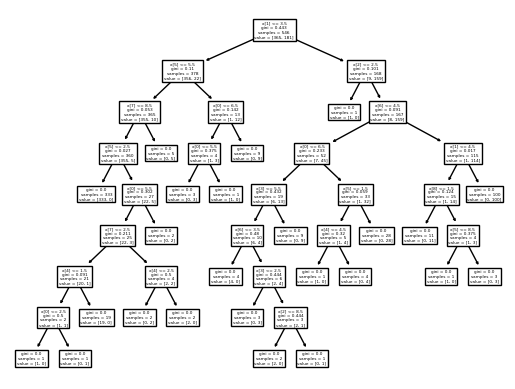

In [9]:
tree.plot_tree(model)

## evaluasi model

In [10]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [11]:
print('akurasi data training :', training_data_accuracy)

akurasi data training : 1.0


In [12]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [13]:
print('akurasi data testing:', test_data_accuracy)

akurasi data testing: 0.9343065693430657


In [14]:
# Prediksi pada data test

y_pred = model.predict(X_test)
y_pred

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2], dtype=int64)

In [15]:
y_test

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2], dtype=int64)

In [16]:
# Memeriksa antara hasil prediksi dan data aktual

df = pd.DataFrame({'Prediksi': y_pred, 'Aktual': y_test})
df

,Prediksi,Aktual
0,4,4
1,4,4
2,2,2
3,2,2
4,2,2
...,...,...
132,4,4
133,4,4
134,4,4
135,2,2


In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix



array([[77,  2],
       [ 7, 51]], dtype=int64)

In [18]:
# Evaluasi Kinerja
print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(classification_report_imbalanced(y_test, y_pred))

accuracy_score 0.9343065693430657
                   pre       rec       spe        f1       geo       iba       sup

          2       0.92      0.97      0.88      0.94      0.93      0.87        79
          4       0.96      0.88      0.97      0.92      0.93      0.85        58

avg / total       0.94      0.93      0.92      0.93      0.93      0.86       137



## buatkan model prediksi

In [19]:
input_data = (3, 1, 1, 1, 2, 2,	3, 1, 1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==2):
    print('Pasien tidak terkena kanker payudara')
else:
    print('Pasien terkena kanker payudara')

[2]
Pasien tidak terkena kanker payudara


g:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [20]:
input_data = (8, 10, 10, 8,	7, 10, 9, 7, 1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==2):
    print('Pasien tidak terkena kanker payudara')
else:
    print('Pasien terkena kanker payudara')

[4]
Pasien terkena kanker payudara


g:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [21]:
import pickle

In [22]:
filename = 'penyakit_kankerpayudaraDT.sav'
pickle.dump(model, open(filename, 'wb'))